# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
api = {
    "username": "najwakhoiraldawiyah",
    "key": "KGAT_802b03781c0126ecfe67475504c819d5"
}

with open("kaggle.json", "w") as f:
    json.dump(api, f)

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle --version

Kaggle API 1.7.4.5


In [4]:
!kaggle datasets download -d blastchar/telco-customer-churn --force

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 441MB/s]


In [5]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [6]:
data_raw = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
data_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data_raw["TotalCharges"] = pd.to_numeric(data_raw["TotalCharges"], errors="coerce")

In [10]:
data_raw.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


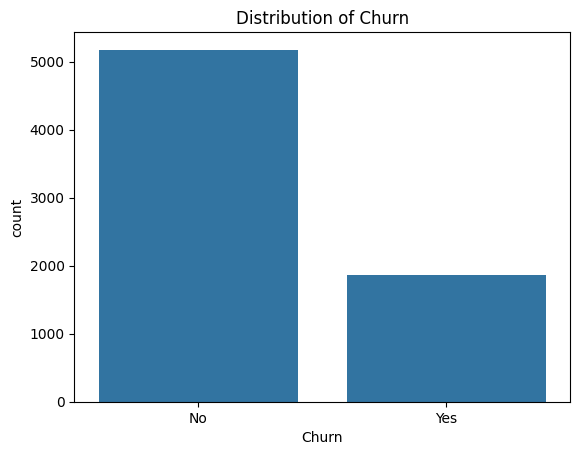

In [11]:
sns.countplot(x="Churn", data=data_raw)
plt.title("Distribution of Churn")
plt.show()

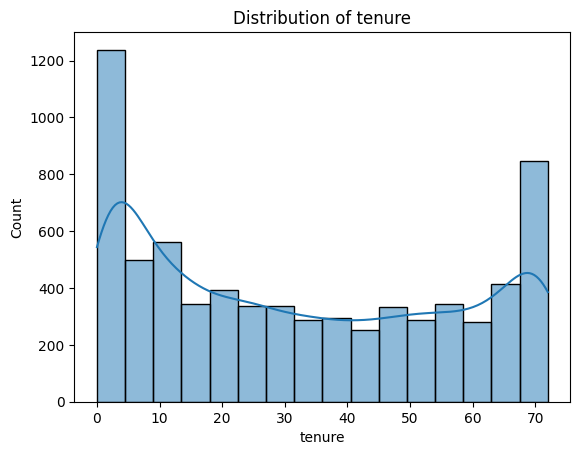

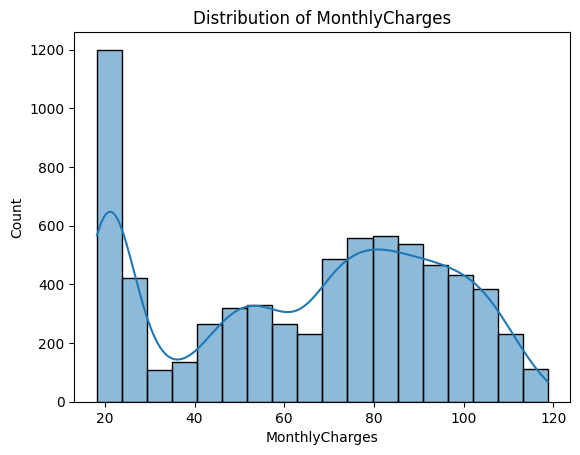

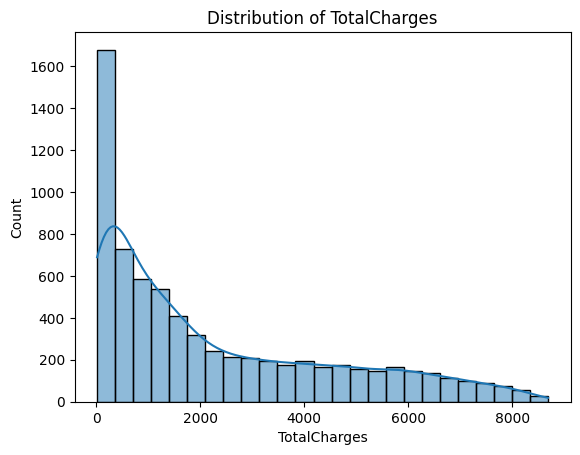

In [12]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    sns.histplot(data_raw[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

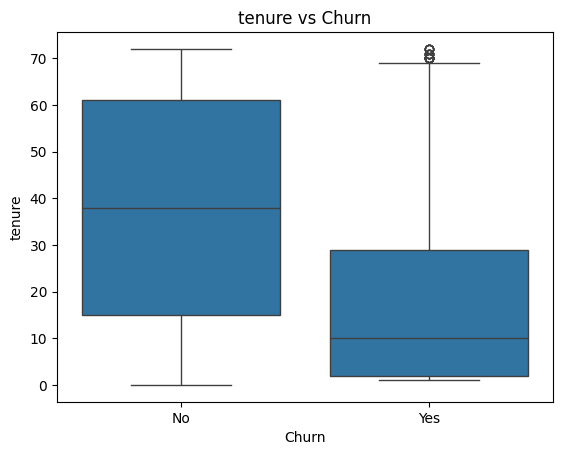

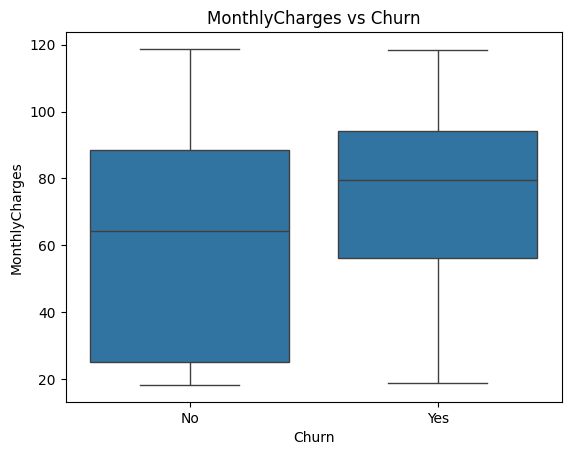

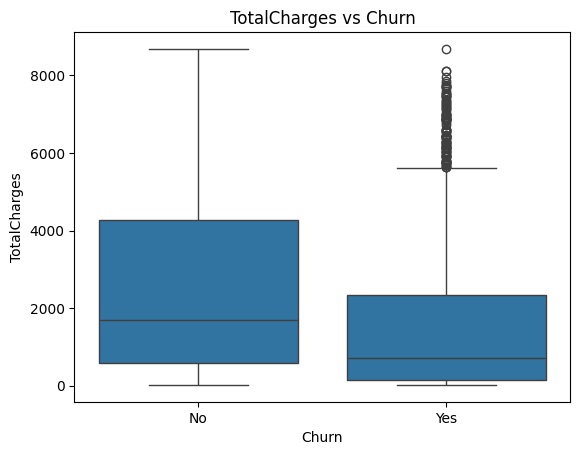

In [13]:
for col in num_cols:
    sns.boxplot(x="Churn", y=col, data=data_raw)
    plt.title(f"{col} vs Churn")
    plt.show()

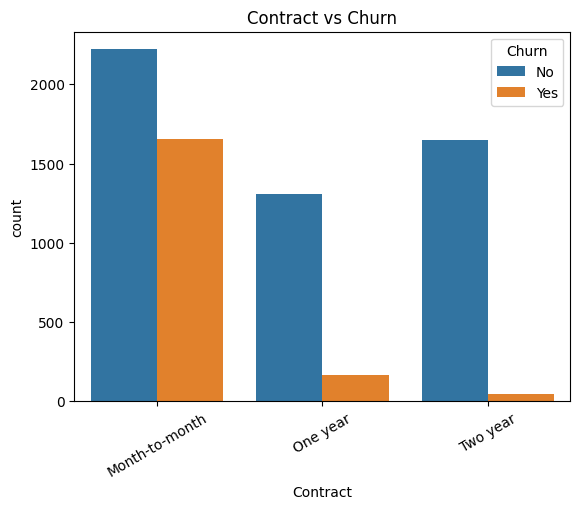

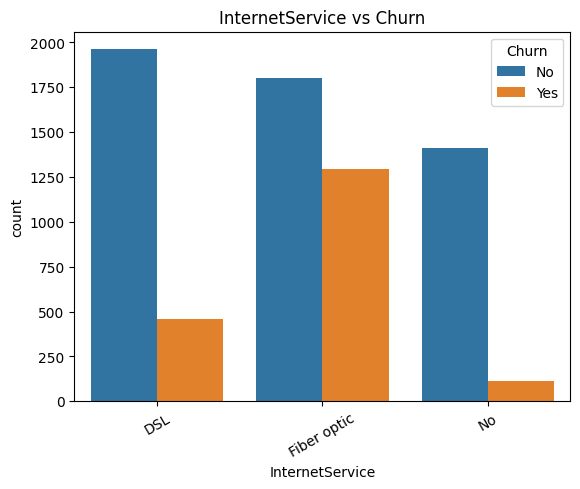

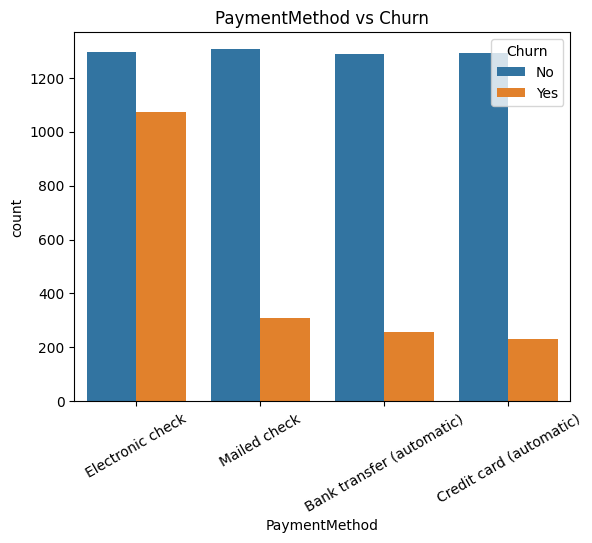

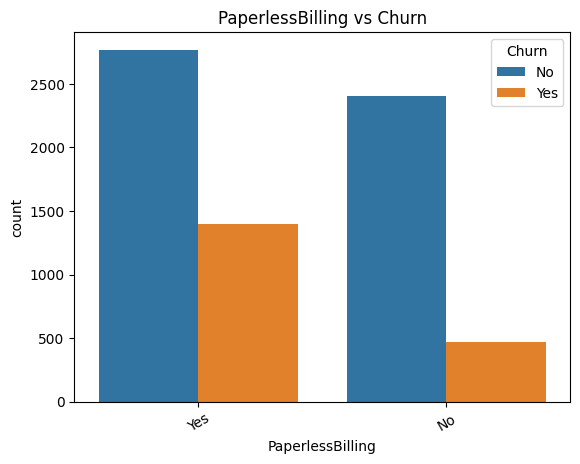

In [14]:
cat_cols = [
    "Contract", "InternetService",
    "PaymentMethod", "PaperlessBilling"
]

for col in cat_cols:
    sns.countplot(x=col, hue="Churn", data=data_raw)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=30)
    plt.show()

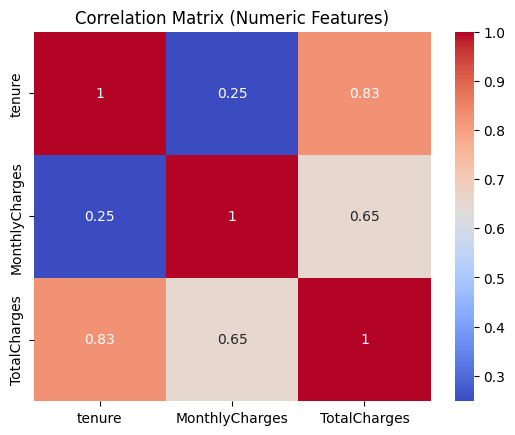

In [15]:
corr = data_raw[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

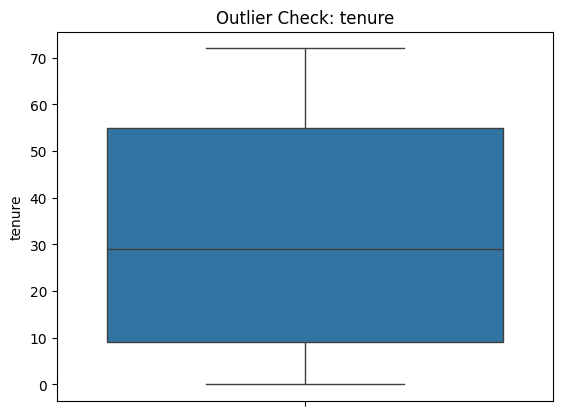

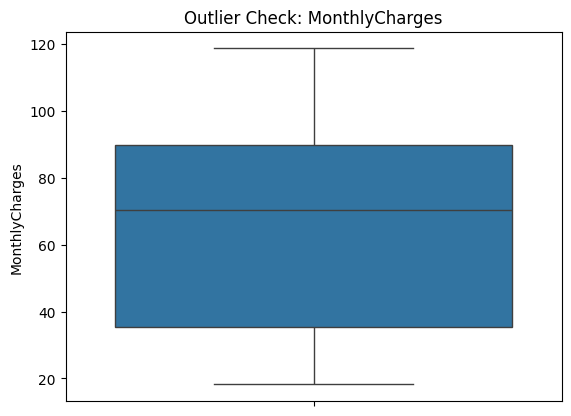

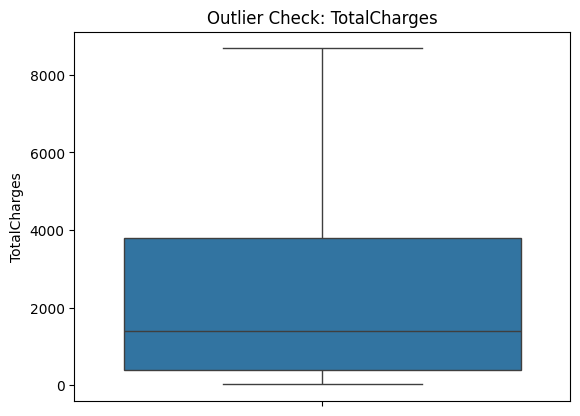

In [16]:
for col in num_cols:
    sns.boxplot(y=data_raw[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

In [17]:
data_raw.duplicated().sum()

np.int64(0)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
data_raw["TotalCharges"].unique()[:10]

array([  29.85, 1889.5 ,  108.15, 1840.75,  151.65,  820.5 , 1949.4 ,
        301.9 , 3046.05, 3487.95])

In [19]:
data_raw["TotalCharges"].isnull().sum()

np.int64(11)

In [20]:
data_raw.loc[data_raw["tenure"] == 0, "TotalCharges"] = 0

In [21]:
data_raw.drop("customerID", axis=1, inplace=True)

In [22]:
data_raw.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Encoding Categorical Features

In [23]:
df_prep = data_raw.copy()

In [24]:
# binary encoding
binary_map = {
    "Yes": 1,
    "No": 0,
    "Male": 1,
    "Female": 0
}

binary_cols = [
    "gender", "Partner", "Dependents",
    "PhoneService", "PaperlessBilling", "Churn"
]

for col in binary_cols:
    df_prep[col] = df_prep[col].map(binary_map)

In [25]:
nominal_cols = [
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"
]

df_prep = pd.get_dummies(
    df_prep,
    columns=nominal_cols,
    drop_first=True
)

In [26]:
df_prep.info()
df_prep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [27]:
dummy_cols = df_prep.select_dtypes(include="bool").columns
df_prep[dummy_cols] = df_prep[dummy_cols].astype(int)

In [28]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [29]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_features = [
    col for col in df_prep.columns
    if col not in num_features
]

In [30]:
X = df_prep.drop(columns="Churn")
y = df_prep["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

In [32]:
lasso = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=0.05,
    max_iter=2000
)

selector = SelectFromModel(lasso)
selector.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.05, max_iter=2000,
                                             penalty='l1', solver='liblinear'))

In [33]:
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

In [34]:
selected_mask = selector.get_support()
selected_features = X_train_scaled.columns[selected_mask]
print("Fitur terpilih:")
for f in selected_features:
    print("-", f)

Fitur terpilih:
- SeniorCitizen
- Dependents
- tenure
- PhoneService
- PaperlessBilling
- MonthlyCharges
- OnlineSecurity_Yes
- OnlineBackup_Yes
- DeviceProtection_Yes
- TechSupport_Yes
- Contract_One year
- Contract_Two year
- PaymentMethod_Electronic check


# Modeling

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [36]:
logreg_1 = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

logreg_1.fit(X_train_scaled, y_train)

# ===== Prediksi =====
y_pred_lr_1 = logreg_1.predict(X_test_scaled)
y_prob_lr_1 = logreg_1.predict_proba(X_test_scaled)[:, 1]

# ===== Evaluasi =====
metrics_lr_1 = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr_1),
    "Precision": precision_score(y_test, y_pred_lr_1),
    "Recall": recall_score(y_test, y_pred_lr_1),
    "F1-score": f1_score(y_test, y_pred_lr_1),
    "ROC-AUC": roc_auc_score(y_test, y_prob_lr_1)
}

In [37]:
rf_1 = RandomForestClassifier(
    random_state=30,
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)

rf_1.fit(X_train_scaled, y_train)

# ===== Prediksi =====
y_pred_rf_1 = rf_1.predict(X_test_scaled)
y_prob_rf_1 = rf_1.predict_proba(X_test_scaled)[:, 1]

# ===== Evaluasi =====
metrics_rf_1 = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf_1),
    "Precision": precision_score(y_test, y_pred_rf_1),
    "Recall": recall_score(y_test, y_pred_rf_1),
    "F1-score": f1_score(y_test, y_pred_rf_1),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf_1)
}

In [38]:
logreg_2 = LogisticRegression(
    penalty=None,
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

logreg_2.fit(X_train_sel, y_train)

# ===== Prediksi =====
y_pred_lr_2 = logreg_2.predict(X_test_sel)
y_prob_lr_2 = logreg_2.predict_proba(X_test_sel)[:, 1]

# ===== Evaluasi =====
metrics_lr_2 = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr_2),
    "Precision": precision_score(y_test, y_pred_lr_2),
    "Recall": recall_score(y_test, y_pred_lr_2),
    "F1-score": f1_score(y_test, y_pred_lr_2),
    "ROC-AUC": roc_auc_score(y_test, y_prob_lr_2)
}

In [39]:
rf_2 = RandomForestClassifier(
    random_state=30,
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)

rf_2.fit(X_train_sel, y_train)

# ===== Prediksi =====
y_pred_rf_2 = rf_2.predict(X_test_sel)
y_prob_rf_2 = rf_2.predict_proba(X_test_sel)[:, 1]

# ===== Evaluasi =====
metrics_rf_2 = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf_2),
    "Precision": precision_score(y_test, y_pred_rf_2),
    "Recall": recall_score(y_test, y_pred_rf_2),
    "F1-score": f1_score(y_test, y_pred_rf_2),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf_2)
}

In [40]:
results_df = pd.DataFrame([metrics_lr_1, metrics_rf_1,metrics_lr_2,metrics_rf_2])
results_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.806246,0.659306,0.558824,0.604920,0.842171
1,Random Forest,0.801987,0.665505,0.510695,0.577912,0.839285
2,Logistic Regression,0.800568,0.643963,0.556150,0.596844,0.840609
3,Random Forest,0.797729,0.653979,0.505348,0.570136,0.836639
